
## Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different products.
* Generate set recommendations that will help the company in targeting new customers.


## Data:
**CardioGoodFitness.csv** - it contains information about customers purchasing product.
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

### Import the necessary packages

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [217]:
data = pd.read_csv("CardioGoodFitness.csv")

In [218]:
# copying data to another varaible to avoid any changes to original data
cardio = data.copy()

### View the first and last 5 rows of the dataset.

In [219]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [220]:
cardio.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Understand the shape of the dataset.

In [221]:
cardio.shape

(180, 9)

### Check the data types of the columns for the dataset.

In [222]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [223]:
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Fixing the data types
* All variables are Integer are valid data type except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* Product,Gender and Marital Status are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [224]:
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [225]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [226]:
# Convert fitness to category
# cardio['Fitness'] = cardio['Fitness'].astype('category')

# Convert Product, Gender and MaritalStatus to category
cardio['Product'] = cardio['Product'].astype('category')
cardio['Gender'] = cardio['Gender'].astype('category')
cardio['MaritalStatus'] = cardio['MaritalStatus'].astype('category')

# Check data types again
cardio.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [227]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


* Product,Gender, Marital Status and Fitness have been converted to categories

`we can see that the memory usage has decreased from 12.8KB to 9.5KB`

In [228]:
cardio.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


### Check for missing values

In [229]:
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing values in the data

### EDA
### Univariate analysis

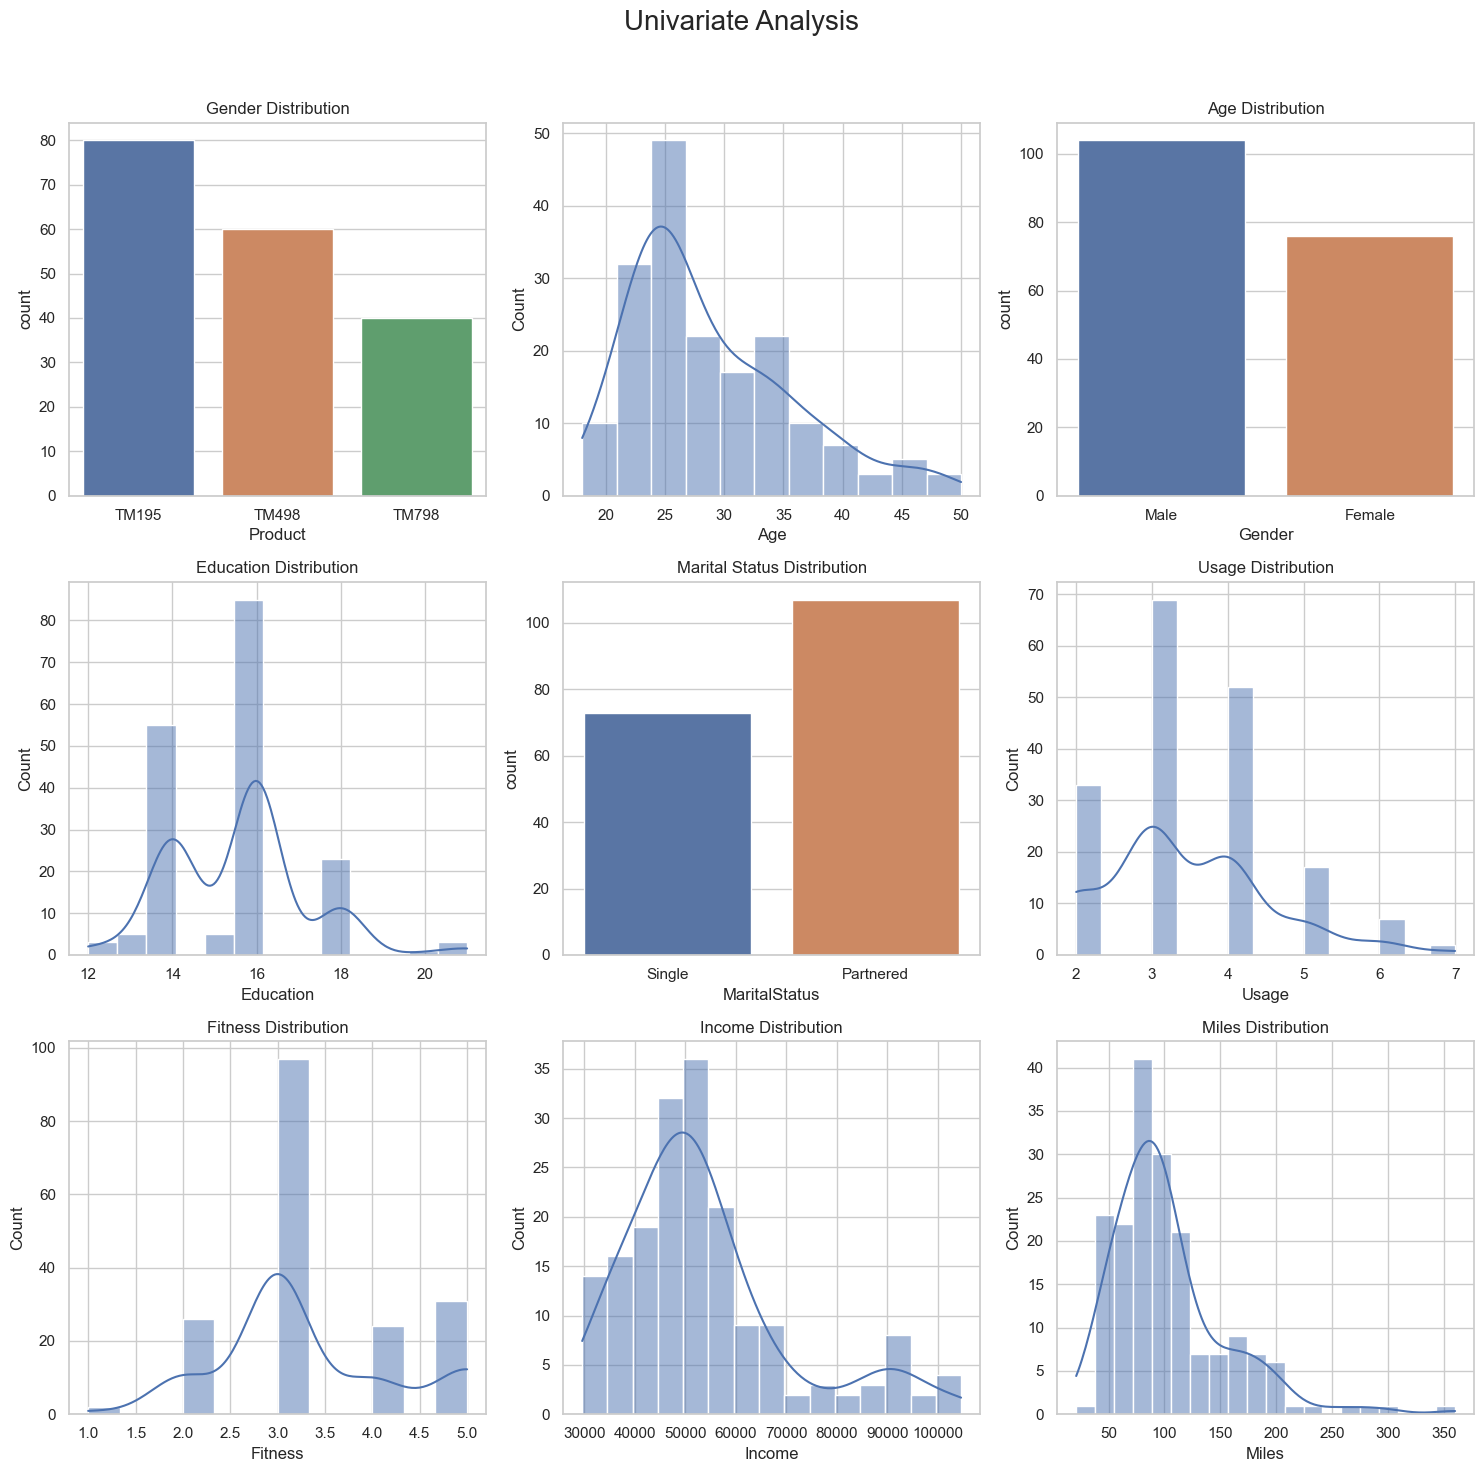

In [230]:
# Setting up the visual style
sns.set(style="whitegrid")

# Function to plot univariate distributions
def plot_univariate_distributions(data):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle('Univariate Analysis', fontsize=20)

    # Plotting Product distribution
    sns.countplot(x='Product', data=data, ax=axes[0, 0])
    axes[0, 0].set_title('Product Distribution')

    # Plotting Age distribution
    sns.histplot(data['Age'], kde=True, ax=axes[0, 1])
    axes[0, 2].set_title('Age Distribution')

    # Plotting Gender distribution
    sns.countplot(x='Gender', data=data, ax=axes[0, 2])
    axes[0, 0].set_title('Gender Distribution')

    # Plotting Education distribution
    sns.histplot(data['Education'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Education Distribution')

    # Plotting Marital Status distribution
    sns.countplot(x='MaritalStatus', data=data, ax=axes[1, 1])
    axes[1, 1].set_title('Marital Status Distribution')

    # Plotting Usage distribution
    sns.histplot(data['Usage'], kde=True, ax=axes[1, 2])
    axes[1, 2].set_title('Usage Distribution')

    # Plotting Fitness distribution
    sns.histplot(data['Fitness'], kde=True, ax=axes[2, 0])
    axes[2, 0].set_title('Fitness Distribution')

    # Plotting Income distribution
    sns.histplot(data['Income'], kde=True, ax=axes[2, 1])
    axes[2, 1].set_title('Income Distribution')

    # Plotting Miles distribution
    sns.histplot(data['Miles'], kde=True, ax=axes[2, 2])
    axes[2, 2].set_title('Miles Distribution')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plotting the univariate distributions
plot_univariate_distributions(data)

In [231]:
# Calculate and print skewness separately
for col in cardio.select_dtypes(include='number').columns:
    skewness = cardio[col].skew()
    if skewness > 0:
        skew_direction = 'right-skewed'
    elif skewness < 0:
        skew_direction = 'left-skewed'
    else:
        skew_direction = 'symmetric'
    print(f'{col} skewness: {skewness} ({skew_direction})')

Age skewness: 0.9821608255301499 (right-skewed)
Education skewness: 0.6222941428985225 (right-skewed)
Usage skewness: 0.7394944961814618 (right-skewed)
Fitness skewness: 0.45479999572809515 (right-skewed)
Income skewness: 1.2917845606896028 (right-skewed)
Miles skewness: 1.7244965928707188 (right-skewed)


In [232]:
cardio.Product.value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

In [233]:
cardio.Gender.value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [234]:
cardio.MaritalStatus.value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

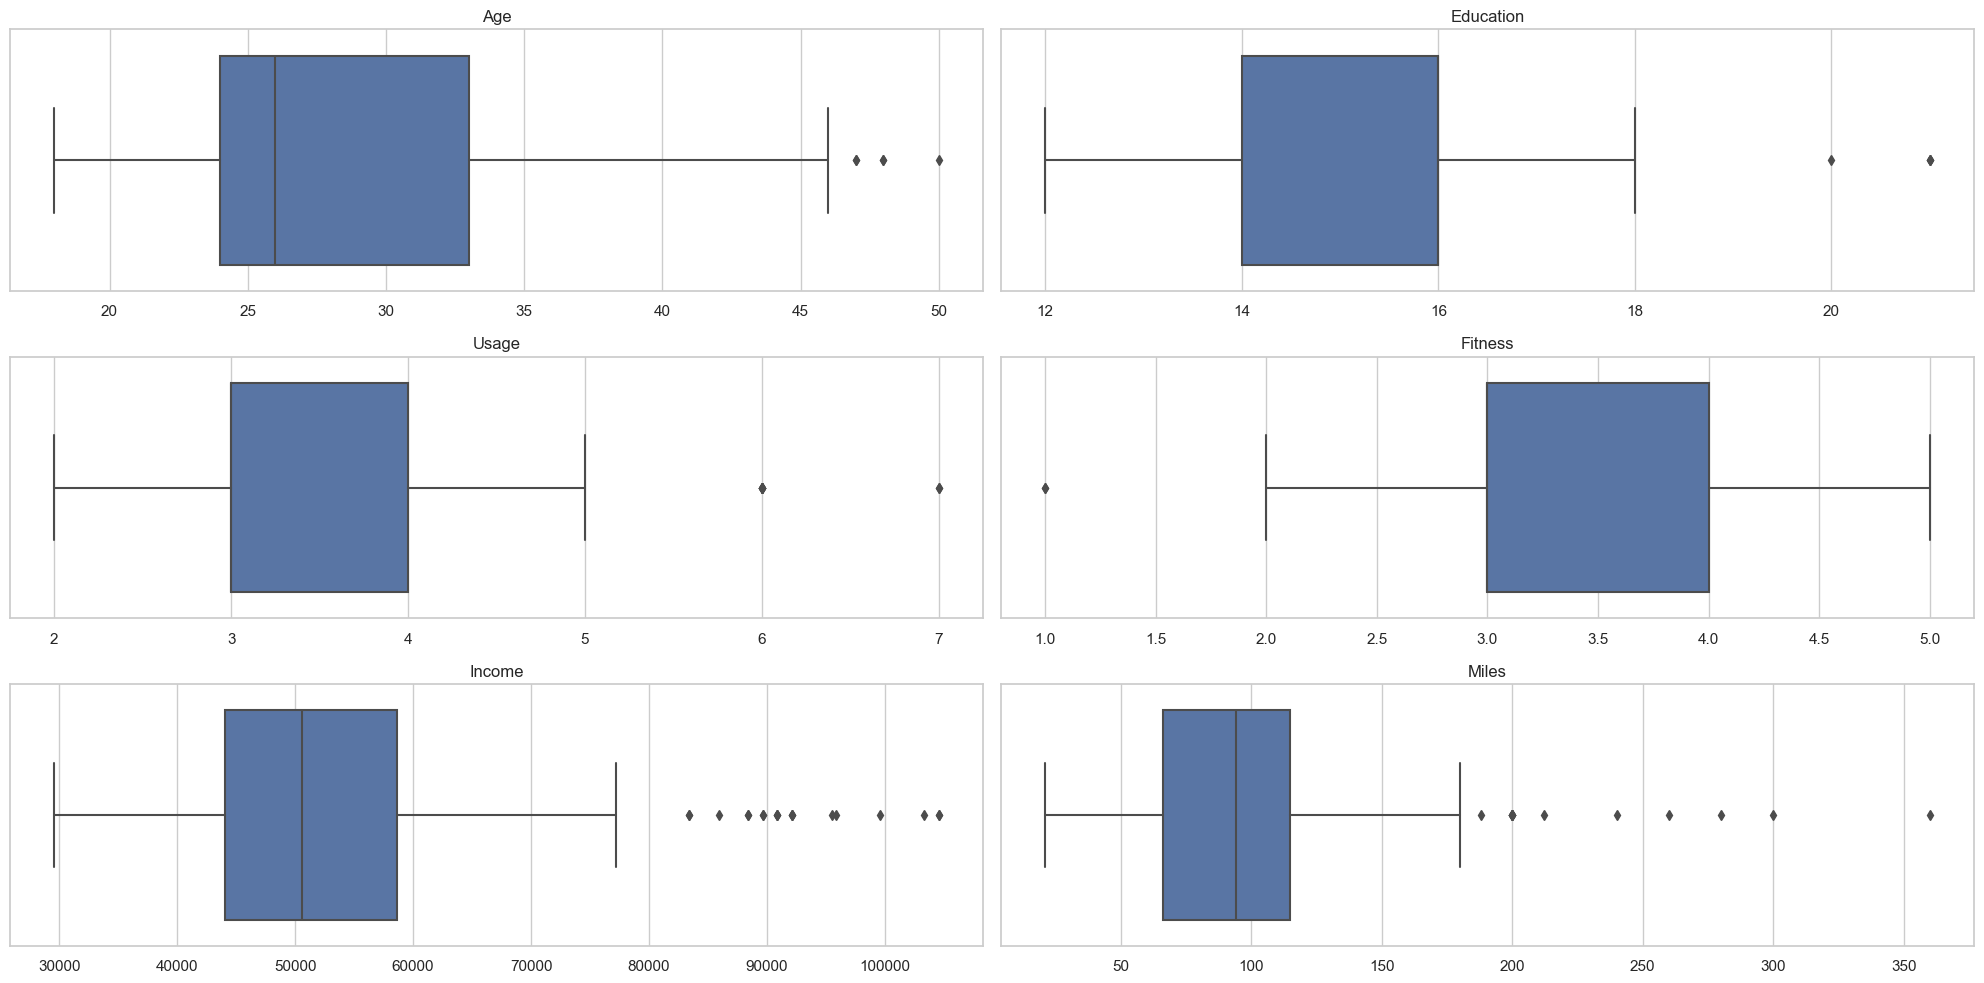

In [237]:
# Selecting numerical columns from the 'cardio' DataFrame
numerical_columns = cardio.select_dtypes(include=['int64', 'float64']).columns

# Setting up the figure size for the plot
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_columns, 1):
    # Creating subplots in a 3x2 grid
    plt.subplot(3, 2, i)
    sns.boxplot(x=cardio[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [238]:
# Dictionary to store the count of outliers for each numerical column
outliers_count = {}

for col in numerical_columns:
    # Calculating the first, third, inter quartile range (Q1, Q3, IQR)
    q1 = cardio[col].quantile(0.25)    
    q3 = cardio[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calculating the lower bound for outliers detection
    lower_bound = q1 - 1.5 * iqr
    
    # Calculating the upper bound for outliers detection
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count[col] = len(cardio[~((cardio[col] >= lower_bound) & (cardio[col] <= upper_bound))])

# Printing the count of outliers for each column
for col, count in outliers_count.items():
    print(f"Column: {col}, Outliers: {count}")

Column: Age, Outliers: 5
Column: Education, Outliers: 4
Column: Usage, Outliers: 9
Column: Fitness, Outliers: 2
Column: Income, Outliers: 19
Column: Miles, Outliers: 13


<Figure size 2000x3000 with 0 Axes>

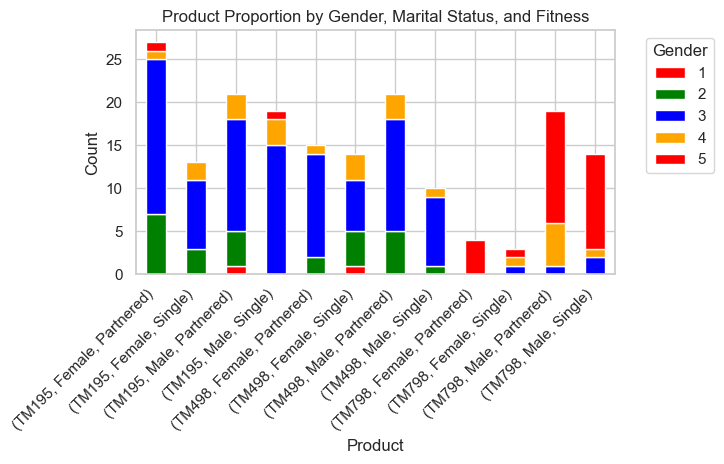

In [239]:
plt.figure(figsize=(20, 30))  # Adjusted figsize for increased height

# Assuming 'Product', 'Gender', 'MaritalStatus', and 'Fitness' are categorical variables in your DataFrame 'cardio'
product_gender_counts = cardio.groupby(['Product', 'Gender', 'MaritalStatus', 'Fitness']).size().unstack(fill_value=0)
# Option 1: Define the 'colors' variable
colors = ['red', 'green', 'blue', 'orange']

# Plot the stacked bar chart
product_gender_counts.plot(kind='bar', stacked=True, color=colors)

plt.title('Product Proportion by Gender, Marital Status, and Fitness')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move legend outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Observations on Age

* The distribution of Age is right skewed.
* There are a outliers in this variable.
* From boxplot we can see that the third quartile(Q3) is equal to 33 which means 75% of customers are below the age of 33.

## Observations on Education

* Mean education for customers is 15.5 years
* There are a few outliers present in data (customers who have education of more than 18 years)

## Observations on Usage

* Customers want to use the treadmills 3-4 times a week on an average.
* There are few outliers, customers who wish to use treadmills 6-7 times a week.

## Observations on Income

* Mean income of customers who bought treadmill is around 55000.
* Income is right skewed.
* It has many ouliers towards the higher end.

## Observations on Miles

* Most customers expect to run 100 miles per week.
* Miles run is right skewed	
* There are outliers present, some customers expect to run more than 200 miles per week, some customers wish to run more than 350 miles per week this could be an error in data collection or any professional runner bought the product.

## Observations on Product

* Highest selling product is TM195(44.4%),followed by TM498(33.3%) and TM798(22.2%)

## Observations on Gender

* There are more males customers(57.8%) than females(42.2%)

## Observations on Marital Status

* 40.6% of customers are single while 59.4% of customers have a partner.

## Observations on Fitness

* 53.9% of the customers have rated them at 3 on a scale of 5 (1 being the least fit and 5 being the most fit),followed by 5 rating (17.2%).

## Observations on Education

* We saw earlier that years of education has a mean of 15.5 years of education, let's check what is the proportion of each level of education among our customer population.

* 47.2% of customers have 16 years of education, followed by 14 years of education(30.6%).

## Observations on Usage

* We saw earlier that customers wish to use products for 3-4 days in a week, let's check what is the proportion of each level of usage among our customer population.

* 38.3% of customers wish to use the product 3 times a week followed by 28.9% customers who wish to use the product 4 times a week.

# Bivariate Analysis


In [240]:
cardio.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [241]:
# prompt: give all feature names into list

feature_names = list(cardio.columns)
feature_names

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

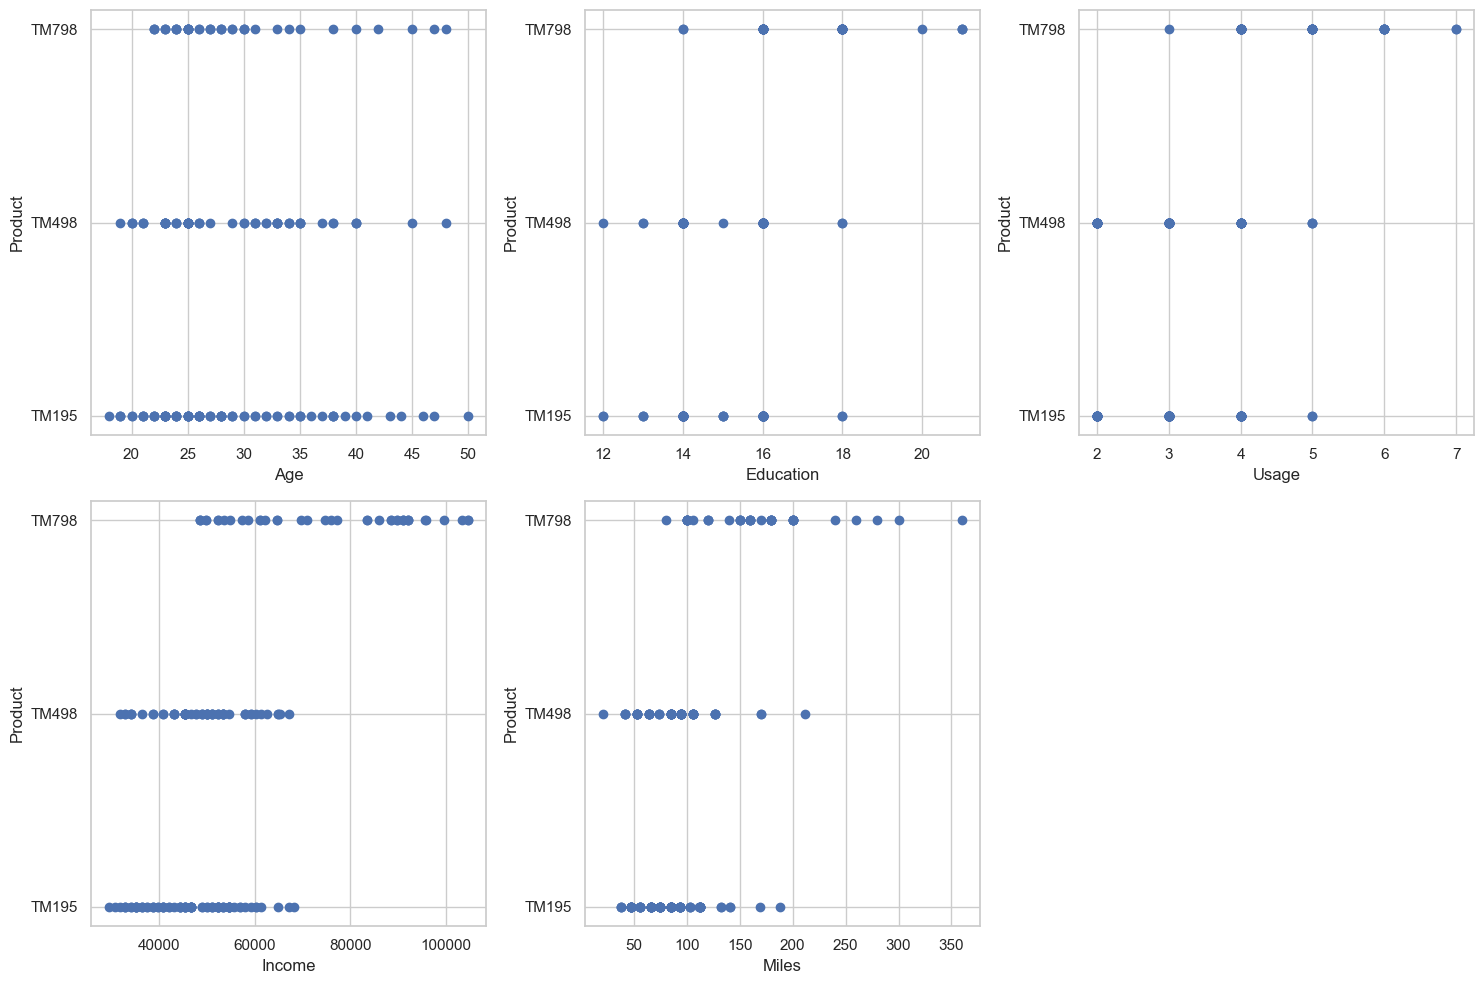

In [242]:
# Select desired columns for plotting
target_column = 'Product'
feature_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']

# Create the scatter plot matrix
plt.figure(figsize=(15, 10))
for i, feature_column in enumerate(feature_columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(cardio[feature_column], cardio[target_column])
    plt.xlabel(feature_column)
    plt.ylabel(target_column)

plt.tight_layout()
plt.show()

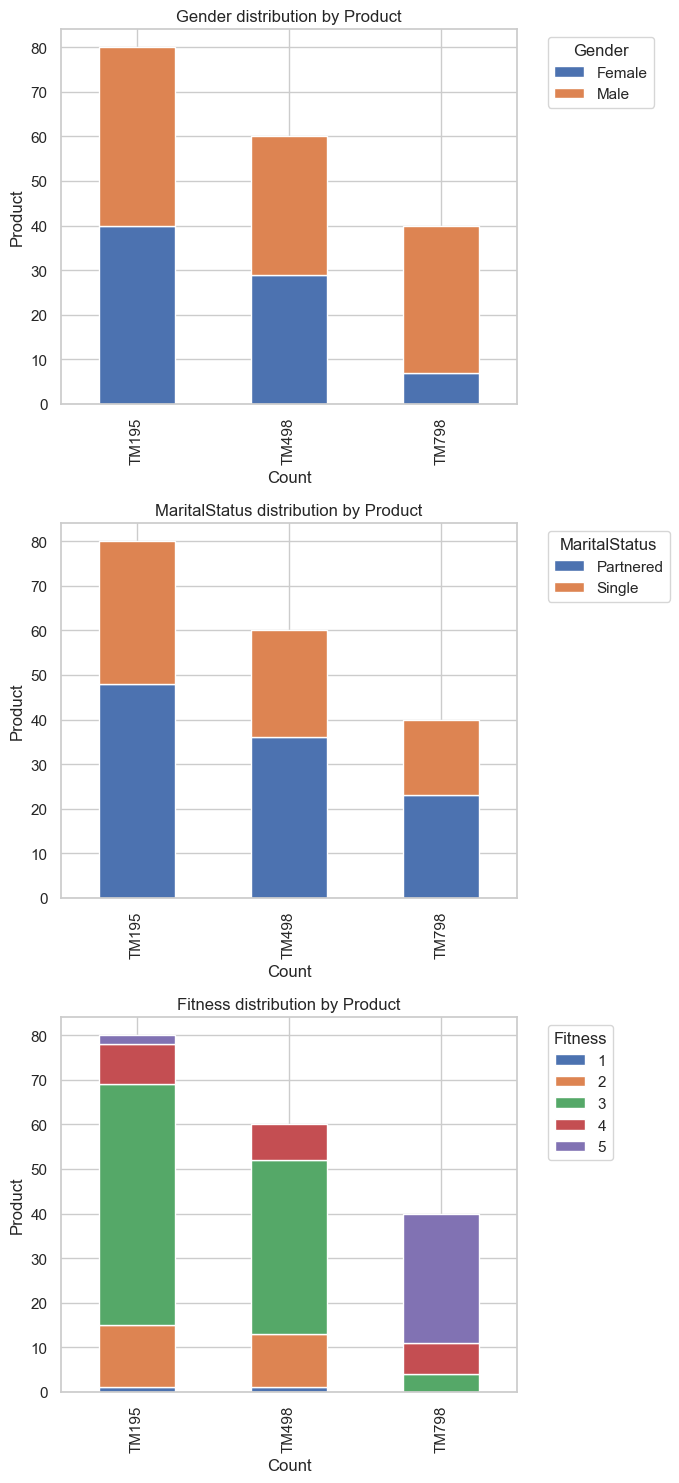

In [243]:
# Create a bar chart for each categorical column, grouped by the 'Product' column
fig, axes = plt.subplots(len(['Gender', 'MaritalStatus', 'Fitness']), 1, figsize=(7, 15))

for i, col in enumerate(['Gender', 'MaritalStatus', 'Fitness']):
    cardio.groupby('Product')[col].value_counts().unstack().plot(kind='bar',stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} distribution by Product')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Product')
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Multivariate Analysis

In [244]:
cardio.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [245]:
cat_columns = ['Gender', 'MaritalStatus', 'Product']

In [246]:
# Convert non-numeric columns to appropriate types and create new columns with numeric codes
for col in cat_columns:
    cardio[col] = cardio[col].astype('category')
    cardio[f'{col}_code'] = cardio[col].cat.codes

In [247]:
# Calculate correlation matrix using only numeric columns
numeric_columns = cardio.select_dtypes(include=[np.number]).columns
corr_matrix = cardio[numeric_columns].corr()

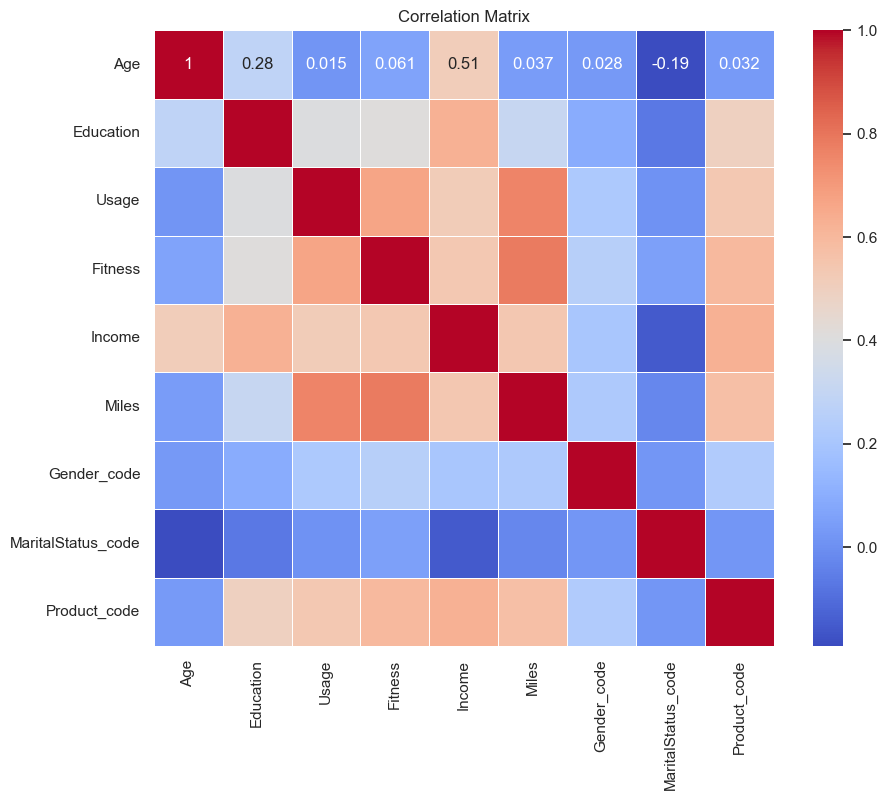

In [248]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [249]:
def get_correlated_columns(df, cat_columns, high_threshold=0.7, low_threshold=0.3):
    # Convert categorical columns to numeric codes
    for col in cat_columns:
        df[col] = df[col].astype('category').cat.codes

    # Calculate correlation matrix using only numeric columns
    corr_matrix = df.corr()

    # Identify highly and lowly correlated columns
    high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                 if col1 != col2 and abs(corr_matrix.at[col1, col2]) >= high_threshold]

    low_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                if col1 != col2 and abs(corr_matrix.at[col1, col2]) <= low_threshold]

    return high_corr, low_corr

# Define the list of categorical columns
cat_columns = ['Gender', 'MaritalStatus', 'Product']

# Get highly and lowly correlated columns
high_corr, low_corr = get_correlated_columns(cardio, cat_columns)

# Print results
print("Highly Correlated Columns:")
print(high_corr)

print("\nLowly Correlated Columns:")
print(low_corr)

Highly Correlated Columns:
[('Product', 'Product_code'), ('Gender', 'Gender_code'), ('MaritalStatus', 'MaritalStatus_code'), ('Usage', 'Miles'), ('Fitness', 'Miles'), ('Miles', 'Usage'), ('Miles', 'Fitness'), ('Gender_code', 'Gender'), ('MaritalStatus_code', 'MaritalStatus'), ('Product_code', 'Product')]

Lowly Correlated Columns:
[('Product', 'Age'), ('Product', 'Gender'), ('Product', 'MaritalStatus'), ('Product', 'Gender_code'), ('Product', 'MaritalStatus_code'), ('Age', 'Product'), ('Age', 'Gender'), ('Age', 'Education'), ('Age', 'MaritalStatus'), ('Age', 'Usage'), ('Age', 'Fitness'), ('Age', 'Miles'), ('Age', 'Gender_code'), ('Age', 'MaritalStatus_code'), ('Age', 'Product_code'), ('Gender', 'Product'), ('Gender', 'Age'), ('Gender', 'Education'), ('Gender', 'MaritalStatus'), ('Gender', 'Usage'), ('Gender', 'Fitness'), ('Gender', 'Income'), ('Gender', 'Miles'), ('Gender', 'MaritalStatus_code'), ('Gender', 'Product_code'), ('Education', 'Age'), ('Education', 'Gender'), ('Education', '

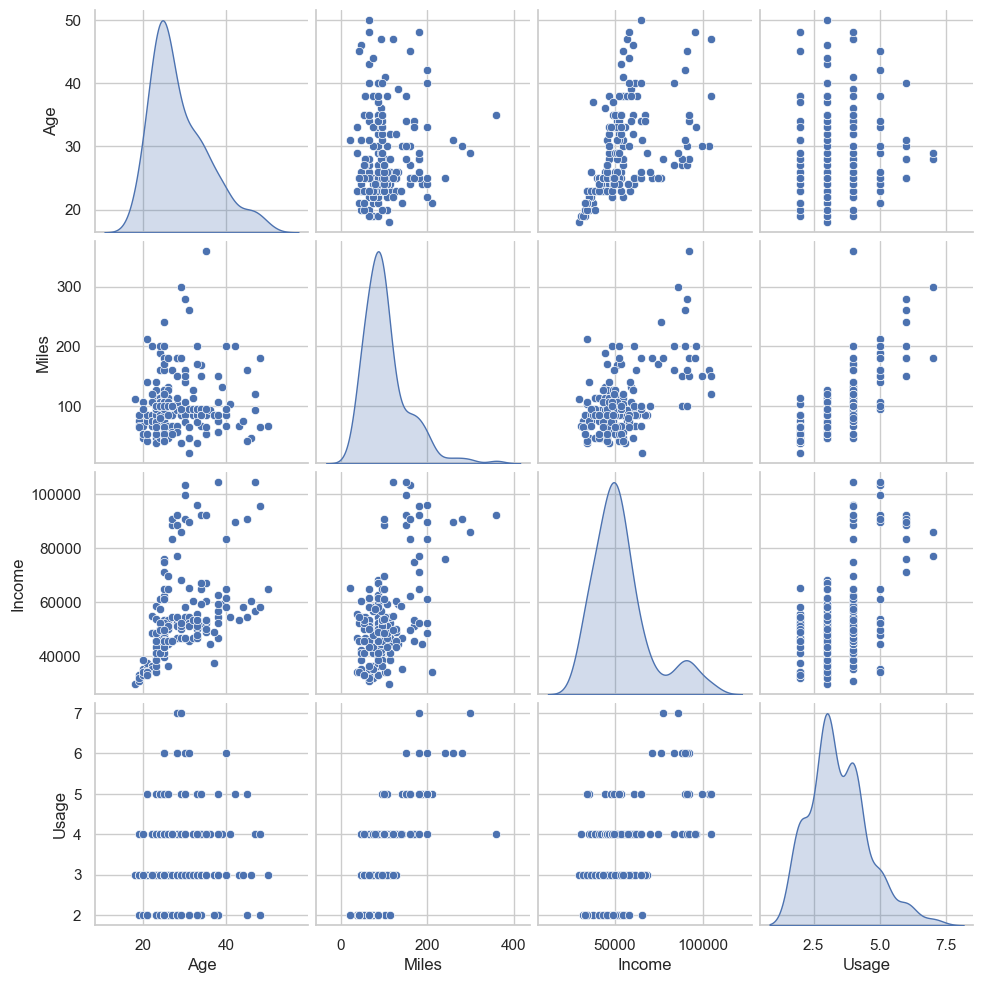

In [250]:
# Get the highly correlated columns
high_corr_columns = ['Age', 'Miles', 'Income', 'Usage']

# Create a pairplot for the highly correlated columns
sns.pairplot(cardio[high_corr_columns], diag_kind='kde')
plt.show()

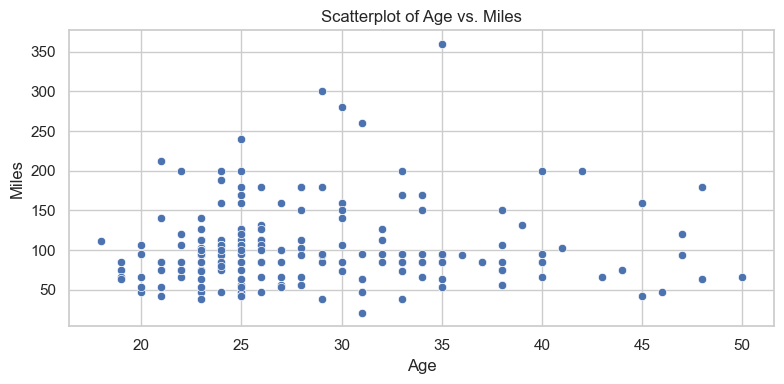

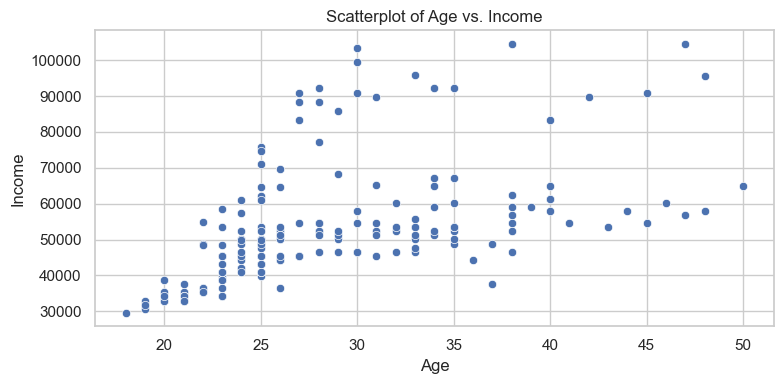

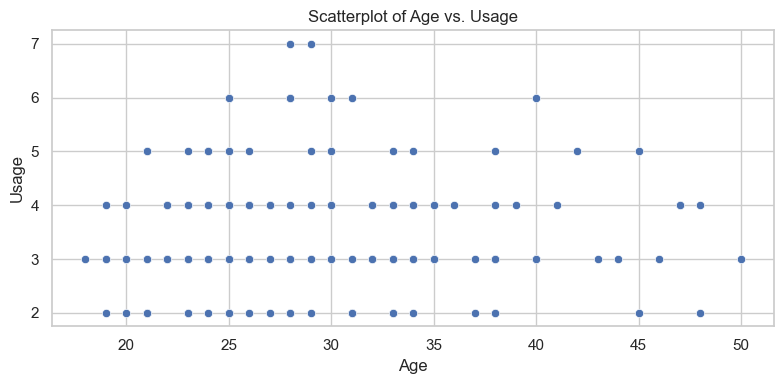

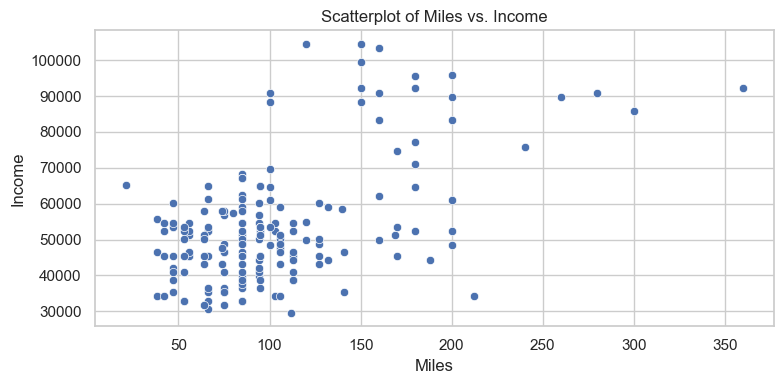

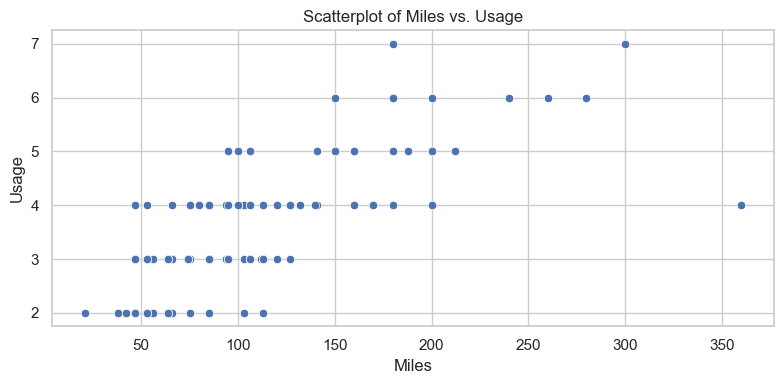

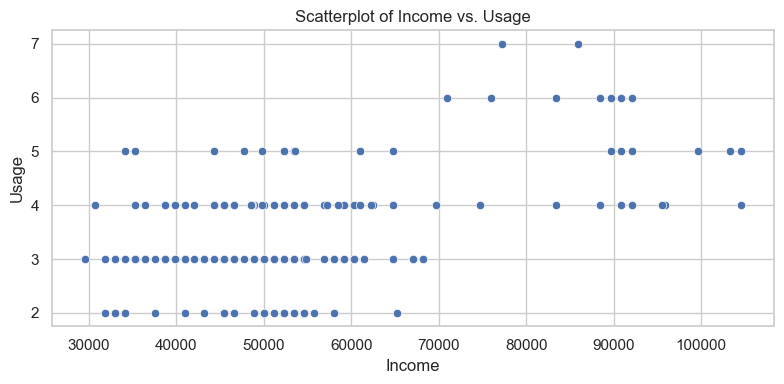

In [251]:
# Set a seaborn style
sns.set(style="whitegrid")
# Iterate through pairs of highly correlated columns
for i, col1 in enumerate(high_corr_columns):
    for col2 in high_corr_columns[i+1:]:
        plt.figure(figsize=(8, 4))  # Set the figure size
        sns.scatterplot(x=cardio[col1], y=cardio[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Scatterplot of {col1} vs. {col2}')
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

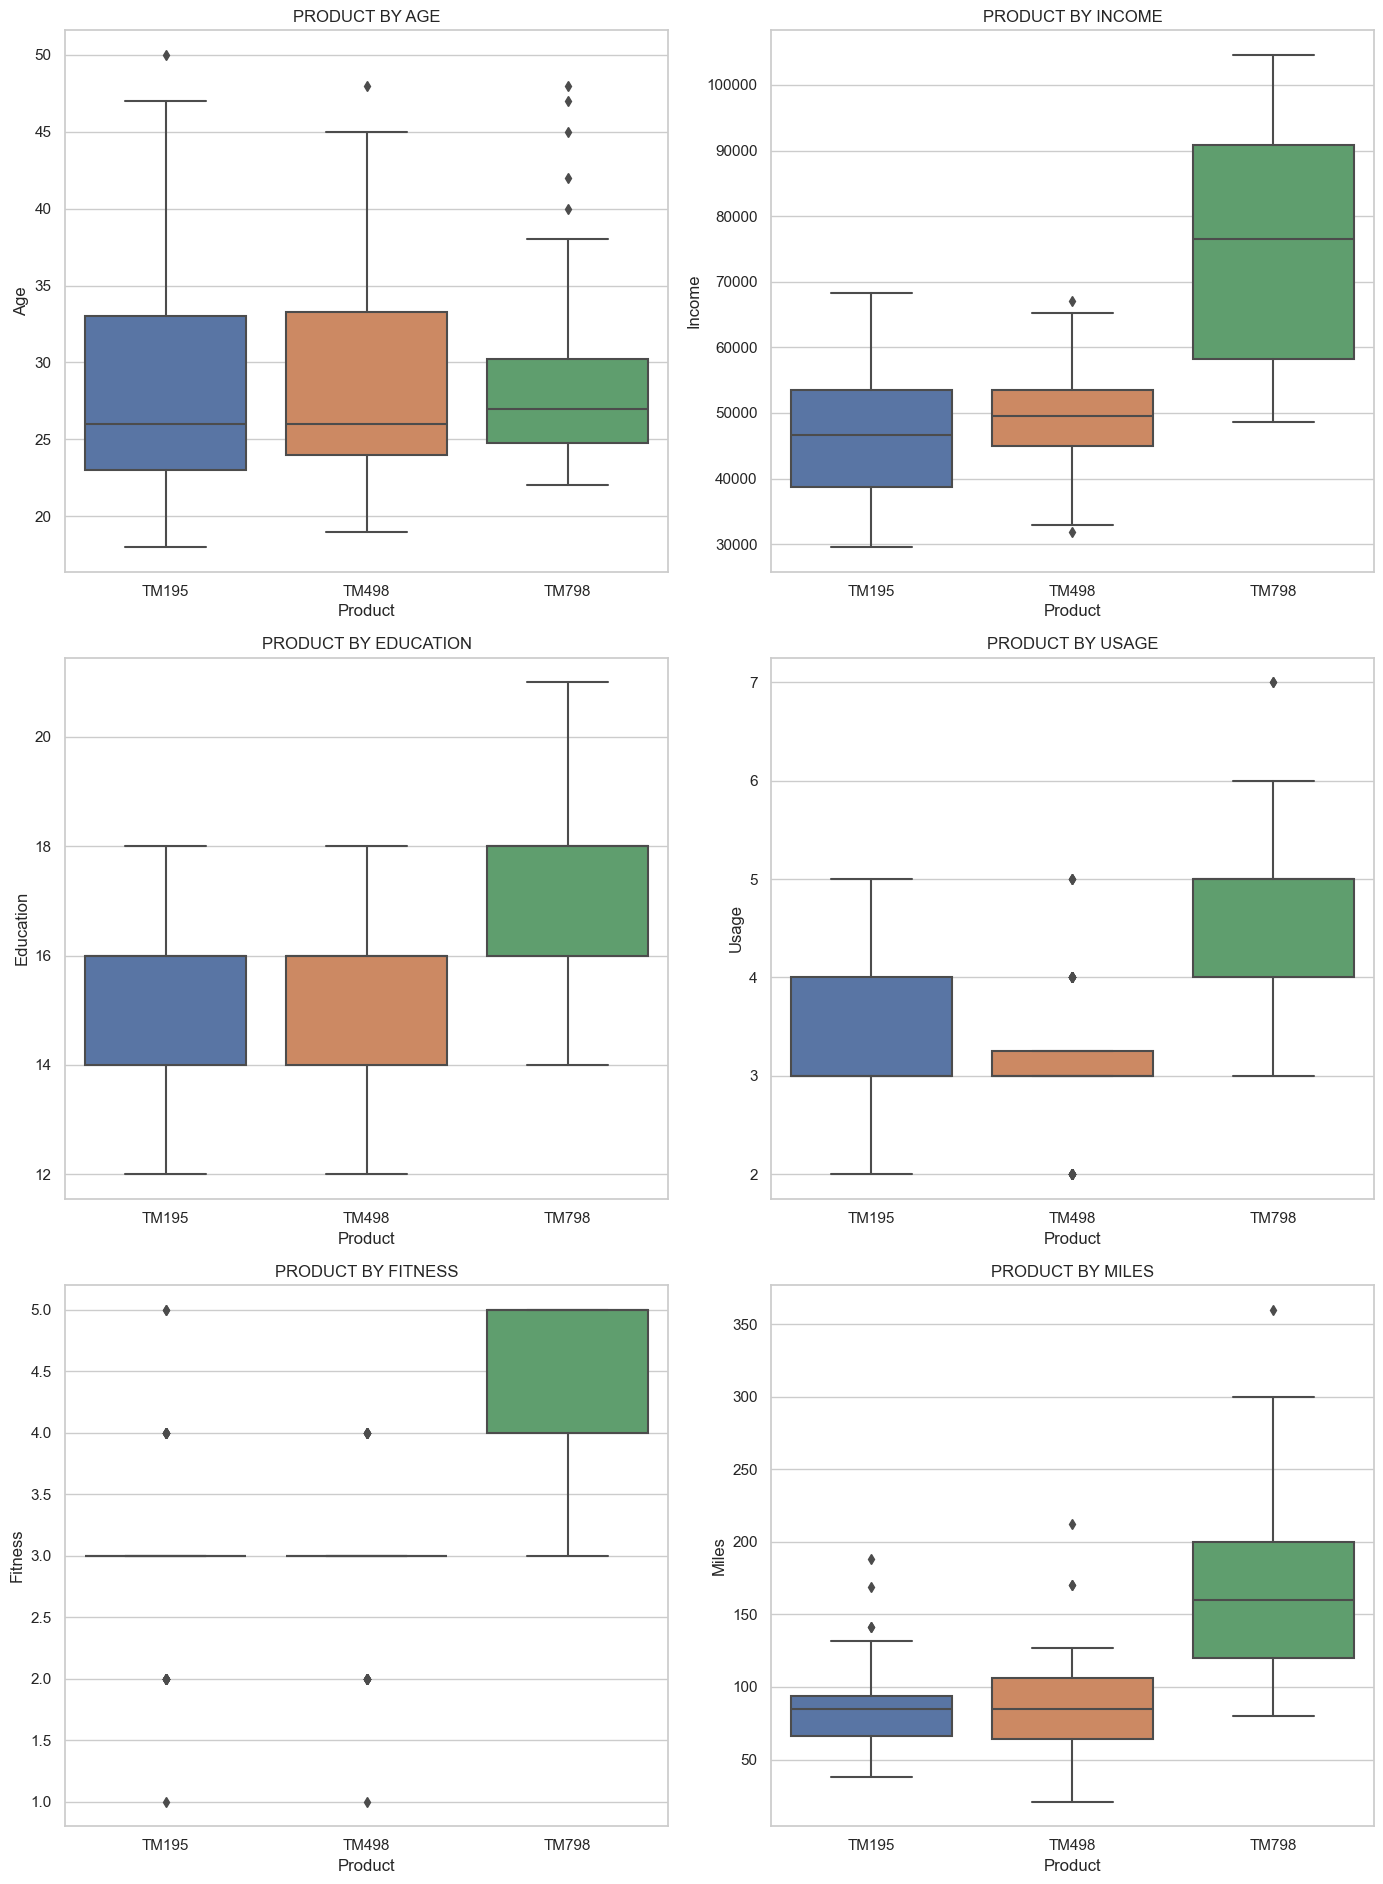

In [252]:
fig1, axes1 = plt.subplots(3, 2, figsize=(14, 19))

# List of columns to plot
list1_col = ['Age', 'Income', 'Education', 'Usage', 'Fitness', 'Miles']

# Loop through each column in the list
for i in range(len(list1_col)):
    # Determine the row and column index for the subplot
    row = i // 2
    col = i % 2
    # Select the specific subplot axis
    ax = axes1[row, col]
    
    # Create a boxplot for the current column grouped by 'Product'
    sns.boxplot(x=data['Product'], y=data[list1_col[i]], ax=ax).set(
        title='PRODUCT BY ' + list1_col[i].upper()  # Set the title for the subplot
    )

# Adjust layout to prevent overlap
plt.tight_layout()

* Miles is highly correlated with usage, a customer running more miles would mean he is also using the treadmill more. 
* Education and Income has a positive correlation, indicating higher the education higher would be the income.
* Income shows a positive correlation with Age , Usage, and Miles.
* A positive correlation between age and income is expected but a high poistive correlation of income with usage and miles should be investigated further.
* We can see varying distributions in variables for different products, we should investigate it further.

### Product vs Age

* TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers)

## Product vs Education

* Customers buying TM798 have higher education as compared to the customers buying the other two other products

## Product vs Usage

* Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

## Product vs Income

* Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Miles

* Customers who expect to run higher miles go for TM798.

## Product vs Gender

* TM798 has been bought more by the male customers as compared to the female customers, for TM195 and TM498 there is equal distribution among genders

## Product vs Marital Status

* All the products are couple/partner friendly.
* Couples/partnered customers have a higher chance of buying a product when compared to single customers.

## Product vs Fitness

* Customers who purchased  TM195 and TM498 gave themselves a balanced fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

### Grouping data w.r.t to products to build customer profiles

In [278]:
def generate_customer_profile(product_code):
    # Filter the data for the specified product
    product_customers = data[data['Product'] == product_code]


    # Generate a detailed profile
    profile_details = {
        "Age Range": f"{int(product_customers['Age'].min())} to {int(product_customers['Age'].max())}",
        "Typical Education": f"{product_customers['Education'].mean()} years (mean)",
        "Income Range": f"${int(product_customers['Income'].min()):,} to ${int(product_customers['Income'].max()):,}",
        "Usage": f"{product_customers['Usage'].mean()} times per week (mean)",
        "Fitness Level": f"{product_customers['Fitness'].mean()} (mean)",
        "Miles": f"{product_customers['Miles'].mean()} miles (mean)"
    }
    
    print(f'{product_code} Customer Profile:')
    print("")
    for key, value in profile_details.items():
        print(f"{key}: {value}")

### TM195 Customer

In [254]:
tm195_profile = generate_customer_profile('TM195')

TM195 Customer Profile:

Age Range: 18 to 50
Typical Education: 15.0375 years (mean)
Income Range: $29,562 to $68,220
Usage: 3.0875 times per week (mean)
Fitness Level: 2.9625 (mean)
Miles: 82.7875 miles (mean)


The TM195 customer is our regular customer (since this product is sold more than others).
* Early 20’s to early 30’s
* 12-18 years of educataion
* Income between 40K and 50K
* Plans to use treadmill three to four times per week for light usage.
* Has an average fitness level (rated 3)

### TM498 Customer

In [255]:
tm498_profile = generate_customer_profile('TM498')

TM498 Customer Profile:

Age Range: 19 to 48
Typical Education: 15.116666666666667 years (mean)
Income Range: $31,836 to $67,083
Usage: 3.066666666666667 times per week (mean)
Fitness Level: 2.9 (mean)
Miles: 87.93333333333334 miles (mean)


The TM498 customers is similar to the TM195 customer in most aspects. The differences are that these customers have a slightly higher annual income, a narrower usage, and a broader expectation of Miles to run each week.

With such a specific usage anticipation it is likely the TM498 customer is a working adult with a fixed or busy schedule (since these customers only tend to use the treadmill 3 times a week)

* Adult in their mid 20’s to early 30’s
* 12-18 years of educatation.
* Income around 50K.
* Plans to use treadmill three days a week for a light to moderate amount.
* Has an average fitness level.

### TM798 Customer

In [256]:
tm798_profile = generate_customer_profile('TM798')

TM798 Customer Profile:

Age Range: 22 to 48
Typical Education: 17.325 years (mean)
Income Range: $48,556 to $104,581
Usage: 4.775 times per week (mean)
Fitness Level: 4.625 (mean)
Miles: 166.9 miles (mean)


The TM798 model attracts a specific customer. In stark contrast to models T498 and T195, the T798 customer is predominantly male, highly educated and has higher salary.
* Generally preferred by Males in late 20’s
* Highly Educated
* Higher income earner
* Plans to use treadmill 4-5 days a week, running 160 miles on an average.
* Considers themselves very fit.

### Customer Segmentation

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

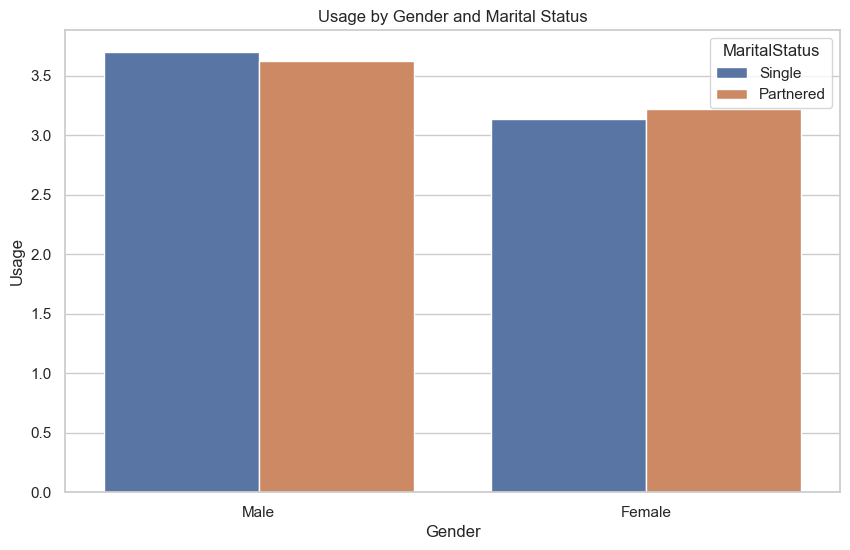

In [257]:
#Usage vs Gender vs Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Usage', hue='MaritalStatus', data=data, ci=None)
plt.title('Usage by Gender and Marital Status')
plt.show()

* Usage for single females, single or partnered male is same it varies for females that have a partner.

## Gender vs Income

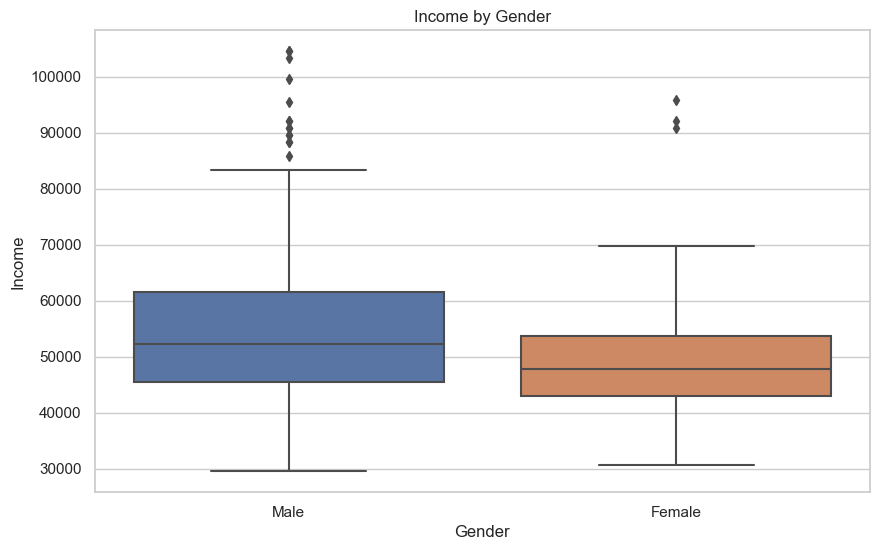

In [258]:
# Gender vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=data)
plt.title('Income by Gender')
plt.show()

* There is a large disparity in income of both the genders, there are more males with higher income than females.

## Gender vs Income vs Marital Status

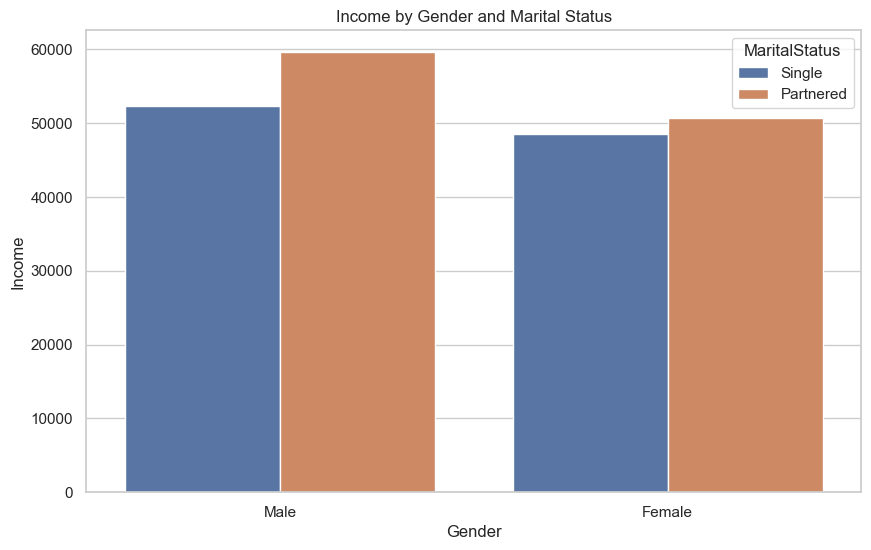

In [259]:
#Gender vs Income vs Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Income', hue='MaritalStatus', data=data, ci=None)
plt.title('Income by Gender and Marital Status')
plt.show()

* Males with a partner have higher income, while the income for single and partnered females is almost compareable.

## Gender vs Miles

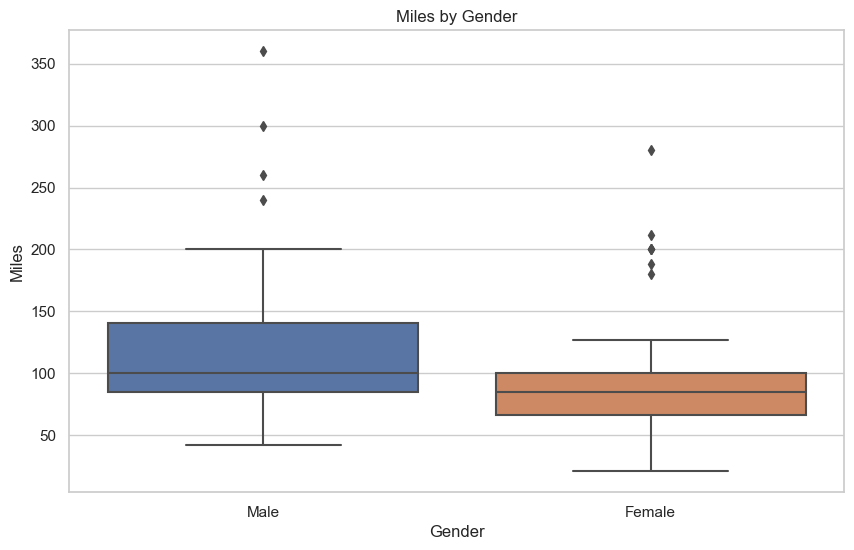

In [260]:
# Gender vs Miles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Miles', data=data)
plt.title('Miles by Gender')
plt.show()

* Males expect to run more miles than females

## Gender vs Miles vs Marital Status

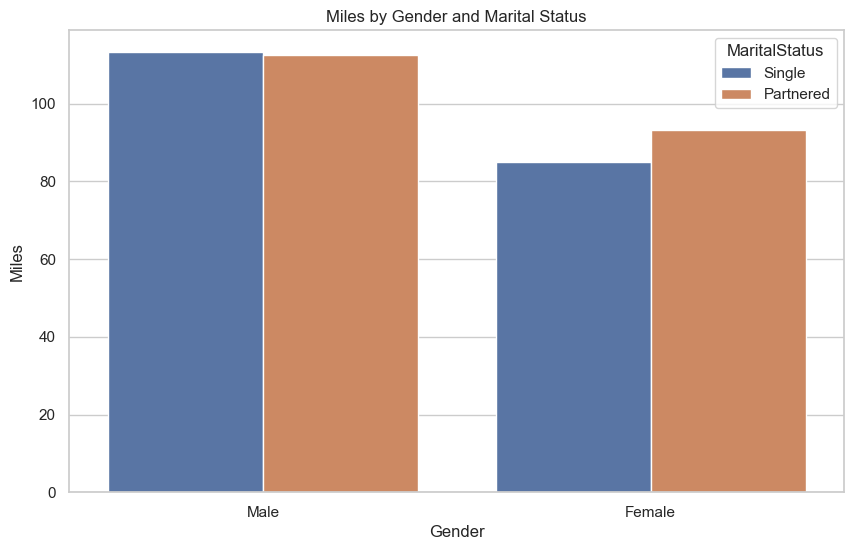

In [261]:
# Gender vs Miles vs Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Miles', hue='MaritalStatus', data=data, ci=None)
plt.title('Miles by Gender and Marital Status')
plt.show()

* Single and Partnered male expect to run more miles, while not much difference can be noticed between Single or Partnered females.

## Gender vs Miles vs Education

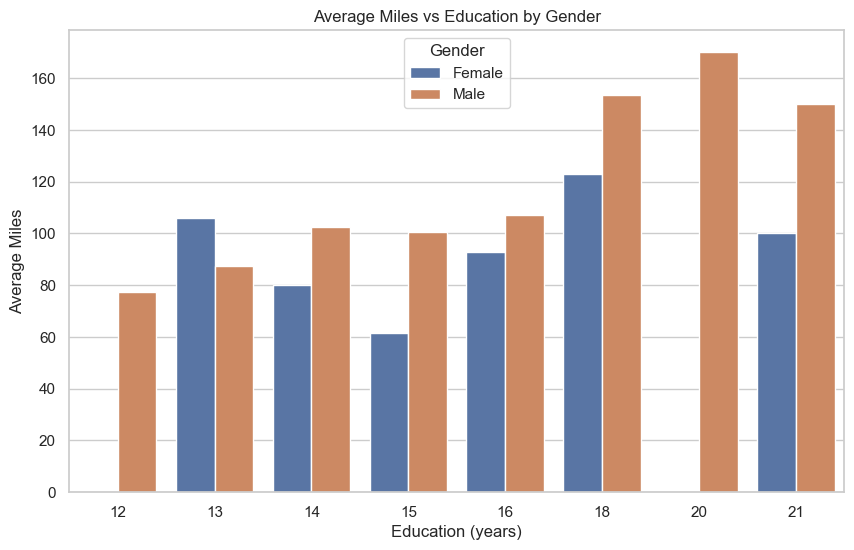

In [262]:
# Gender vs Miles vs Education
plt.figure(figsize=(10, 6))
mean_miles = data.groupby(['Gender', 'Education'])['Miles'].mean().reset_index()
sns.barplot(data=mean_miles, x='Education', y='Miles', hue='Gender')

# Adding title and labels
plt.title('Average Miles vs Education by Gender')
plt.xlabel('Education (years)')
plt.ylabel('Average Miles')
plt.legend(title='Gender')

# Show the plot
plt.show()

* The expected miles to run increases as the education level increases, indicating that the more educated customers are more fitness aware.

## Age vs Miles vs Gender

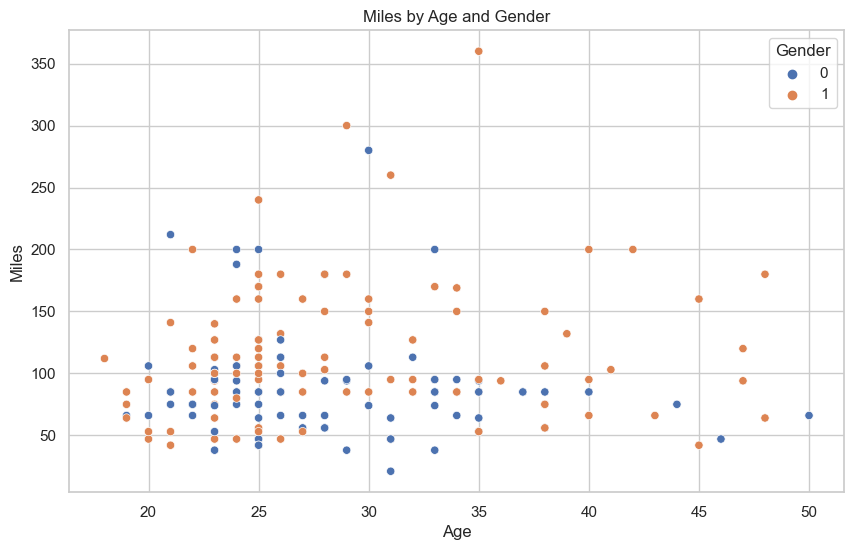

In [274]:
#Age vs Miles vs Gender
plt.figure(figsize=(10, 6))
# Creating a scatter plot
sns.scatterplot(x='Age', y='Miles', hue='Gender', data=cardio)
plt.title('Miles by Age and Gender')
plt.show()

* With the increase in age the average expected miles to run decreases in females, whereas for males it shows an increasing and decreasing trend.
* As the age increases above 25, males expect to run more miles than females.
* After 30 there is a sharp decrease in the Average miles a female expects to run.

## Age vs Miles vs Marital Status

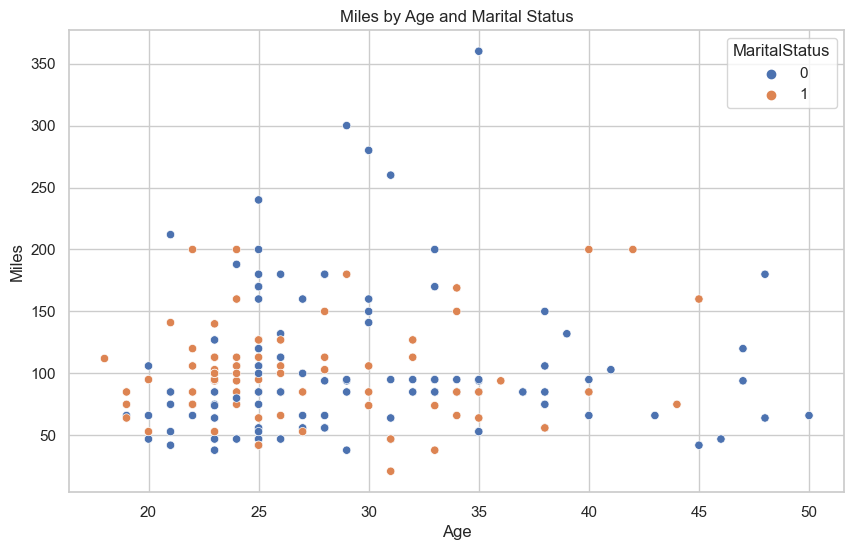

In [264]:
#Age vs Miles vs Marital Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Miles', hue='MaritalStatus', data=cardio)
plt.title('Miles by Age and Marital Status')
plt.show()

* The trend is mostly similar across younger years for a single or a customer with a partner, however after 40 years singles tend to work more on their fitness.

## Age vs Income vs Product

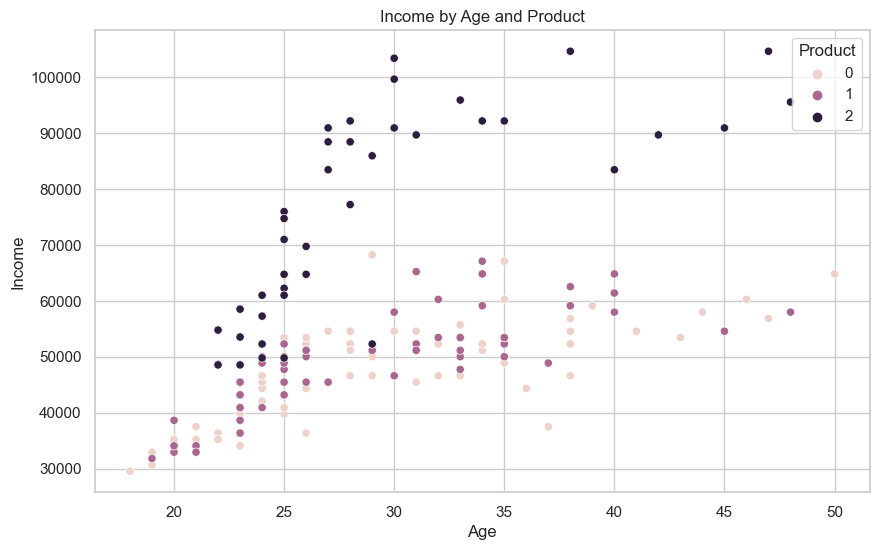

In [265]:
#Age vs Income vs Product
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Product', data=cardio)
plt.title('Income by Age and Product')
plt.show()

* TM195 and TM498 have simlilar income group customers[30k-60k] for all age groups but TM798 is purchased by higher income [greater than 60k] customers only for all age groups.

## Income vs Miles vs Education

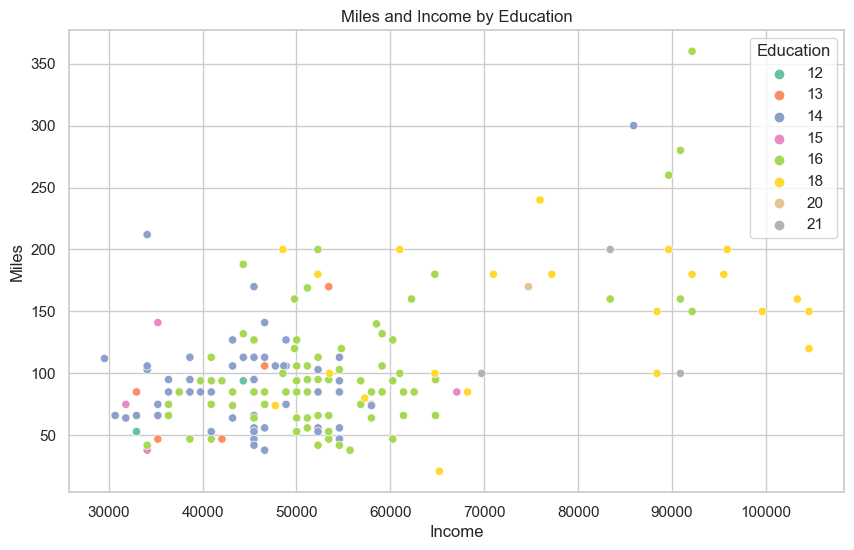

In [277]:
#Income vs Miles vs Education
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Miles', hue='Education', palette='Set2', data=cardio)
plt.title('Miles and Income by Education')
plt.show()

*  Customers having an income of more than 70k have 18-21 years of education and expect to run 100-200 miles a week.

## Income vs Miles vs Product

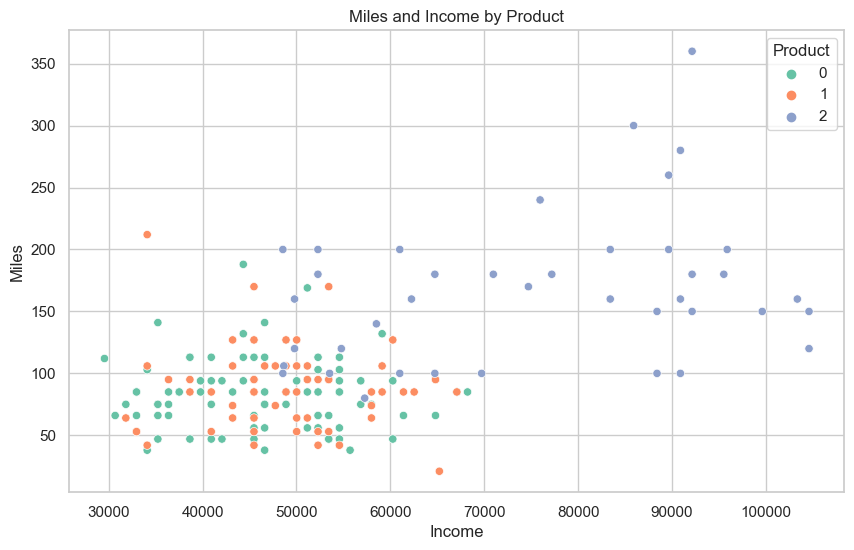

In [275]:
#Income vs Miles vs Product
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Miles', hue='Product', palette='Set2', data=cardio)
plt.title('Miles and Income by Product')
plt.show()

* Customers having an income of more than 70k tend to buy TM798 and run more miles.

## Conclusion

### Key insights

#### TM195: 

* An affordable and general-purpose treadmill that can be used for a wide range of users.

* It can be considered as an entry-level product generally targeted for first-time fitness enthusiasts or college-going population. 

* Customers with light to moderate usage 3 to 4 times a week go for this product.


#### TM495: 

* An affordable product like the TM195 with more features and probably has a high price than TM195. 

* The product also generally targets the same age group as the TM195 but has users of slightly higher income.

* The product is used generally 3 times per week.


#### TM798: 

* A top of the range treadmill with plenty of features that excite the fitness enthusiasts. 

* It has a higher price point and probably the flagship product of the company. 

* The buyers of the product are core users that rate themselves very highly on the fitness score as evident from the usage and expected miles to run. 

* The buyers in this segment are more educated, have an income(greater than 60k) more than the other two treadmill users, and take their fitness very seriously. 

* Male customers prefer this product more than females.

### Business Recommendations

* The company has an affordable product in its portfolio that brings in the bulk of the volume of its sales, which is the TM195. The TM798 is their flagship product that brings in the profits for the company. 


* The company needs to engage in more marketing to convey that product TM798 is suitable for both the genders and try to lure the younger age group into buying their flagship product. Currently, it seems TM798 is marketed as an exclusive product for the males making more money as there is a large disparity in income for both genders.


* Years of education are proportionate to income, and so customers with higher education can be recommended an expensive model(TM798).


* Females above 30 years can be recommended the lower end products(TM195 and TM498) since they wish to run a fewer number of miles and therefore the usage of the product won't be higher.


* Partnered Females can be recommended all types of products (low end to high end) since their usage varies from 2 days per week to 6 days per week.


* Singles above 40 years can be recommended the higher end product(TM798) since they wish to run more miles and therefore the usage would be higher.


* Partnered males have a higher income and also expect to run more miles hence the higher end product TM798 would be a good recommendation for them.

<hr />

The company's line of products includes the TM195, which is a high-volume seller, and the TM798, which is their flagship product and a significant profit center. The TM798 has to be marketed to appeal to a younger demographic and be appropriate for both genders. Higher educated clients are suggested to purchase the TM798; income and education levels are correlated with purchasing preferences.

Because women over 30 like to use less miles per gallon, the TM195 and TM498 are suggested. Since partnered ladies' usage patterns vary, any product can be recommended to them. For individuals over 40 who require more mileage, the TM798 is advised. The TM798 is best suited for married men with higher earnings and mileage requirements.